# Figure 1 Replication

This page contains the code to replicate Figure 1 in the paper which shows period 1 and period 2 consumption levels under various possible contracts.

## Code
Several functions used can be found in the python module [Contract.py](Contract.py)

In [1]:
import Contract

Code below uses this module to produce Figure 1.  If code is hidden in HTML view, click button to display.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

In [3]:
def Figure1(cC, idl = False):
    cCF = cC.fcommit()    # point F
    cCRP = cC.reneg(cCF)  # point R
    y = cC.y
    
    # point P
    btr = cC.beta**(1/cC.rho)
    q1 = (cCF[1]+cCF[2])/(1+btr)
    q2 = btr*q1
    
    
    c1min, c1max = 0, 135
    c1 = np.arange(c1min, c1max, 1)
    ubar0 = cC.PVU(cCF[1:3], 1.0)
    idc0 = cC.indif(ubar0, 1.0)
    ubar1 = cC.PVU(cCF[1:3],cC.beta)
    idc1 = cC.indif(ubar1,cC.beta)
    ubar0RP = cC.PVU(cCRP[1:3], 1.0)
    idc0RP = cC.indif(ubar0RP,1.0)
    ubar1RP = cC.PVU(cCRP[1:3], cC.beta)
    idc1RP = cC.indif(ubar1RP,cC.beta)
    
    fig, ax = plt.subplots()

    # indifference curves ( c1[:] slicing to clip lengths)
    s0 = slice(int(cCF[1])-15, int(q1)+2)
    s1 = slice(int(cCF[1])-7, int(q1)+20)
    ax.plot(c1[s0], idc0(c1[s0]), color='blue')  # --Zeros's indif through F        
    ax.plot(c1[s1], idc1(c1[s1]), color='red')   # --One's indif through F
    
    # rays
    ax.plot(c1[:s0.stop], c1[:s0.stop],':',color='black')
    ax.plot(c1[:s1.stop], cC.beta**(1/cC.rho)*c1[:s1.stop],':',color='black')
    
    # isoprofit line(s)
    isoprofline = cC.isoprofit(cC.profit(cCF,cC.y)-(y[0]-cCF[0]), y)
    ax.plot(c1,  isoprofline(c1),':' )

    isoproflineK = cC.isoprofit(cC.profit(cCF,cC.y)-(y[0]-cCF[0])+cC.kbar(), y)
    ax.plot(c1,  isoproflineK(c1),':' )

    # Axes
    ax.spines['right'].set_color('none'), ax.spines['top'].set_color('none')
    ax.set_xlim(0, c1max)
    ax.xaxis.tick_bottom(), ax.yaxis.tick_left()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_ylim(-0.25, 85)
    ax.text(c1max, -4, '$c_{1}$', fontsize=12)
    ax.text(-5, 82, '$c_{2}$', fontsize=12)
    
    #-- Intercept points on y axis
    ax.scatter(cCF[1]+cCF[2],0, marker='o',color='k', zorder=10)
    ax.scatter(cCF[1]+cCF[2]- cC.kbar(),0, marker='o',color='k', zorder=10)
    ax.text(cCF[1]+cCF[2] - 3 , -5, r'$c_1^F+c_2^F$', fontsize=12)
    ax.text(cCRP[1] + cCRP[2] - cC.kbar() - 3, -5, r'$c_1^F+c_2^F -\bar \kappa$', fontsize=13)
    
    
    # label the points and rays
    ax.text(cCF[1]+3, cCF[2], r'$F$', fontsize=15)
    ax.text(cCRP[1]-3.5, cCRP[2]-4, r'$R$', fontsize=15)   
    ax.text(q1, q2+1.5, r'$P$', fontsize=15)
    ax.text(35, 32, r'$c_2=c_1$', fontsize=12)
    ax.text(35, btr*(29), r'$c_2=\beta^\frac{1}{\rho} \cdot c1$', fontsize=12)
    ax.text(c1[s0.stop]-2, idc0(c1[s0.stop])+2, 'Zero-self', fontsize=11)
    ax.text(c1[s0.stop]+1, idc0(c1[s0.stop])-1, 'indifference curve', fontsize=11)
    ax.text(c1[s1.stop]-3, idc1(c1[s1.stop])+2, 'One-self', fontsize=11)
    ax.text(c1[s1.stop]+1, idc1(c1[s1.stop])-1,  'indifference curve', fontsize=11)   
    
    # contract points and coordinate lines http://bit.ly/1CaTMDX
    xx = [cCF[1], cCRP[1], q1]
    yy = [cCF[2], cCRP[2], q2]
    ax.scatter(xx, yy, s=50, marker='o',color='k', zorder=10)
    if idl:  #indicator lines if wanted
        [plt.plot([dot_x, dot_x] ,[0, dot_y],':',linewidth = 1,color='black' ) 
         for dot_x, dot_y in zip(xx,yy) ] 
        [plt.plot([0, dot_x] ,[dot_y, dot_y],':',linewidth = 1,color='black' ) 
         for dot_x, dot_y in zip(xx,yy) ]

    fig.savefig('Figure1.pdf', bbox_inches="tight")

In [4]:
def Fig1(beta = 0.4, rho = 0.8):
    cC = Contract.Competitive(beta)
    cC.rho = rho
    Figure1(cC, idl=False)

The parameters ($\beta = 0.4$, $\rho = 0.8$) used were chosen to exagerate curvature and spacing for presentation clarity but the essential relationships hold for more reasonable assumptions. In the interactive further below you can vary the parameters yourself using sliders.

## Figure 1 plot

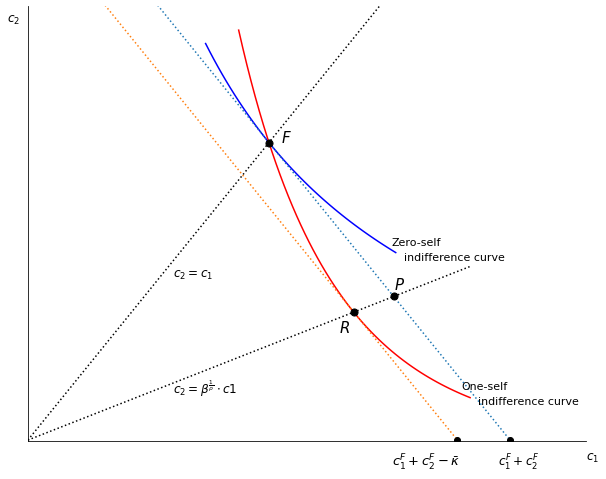

In [5]:
Fig1(beta = 0.4, rho = 0.8)

# Interactive Plot

In order for the widget sliders to affect the chart you must be running this on a jupyter notebooks server.  If you are viewing this on the web, click on the Rocket icon button above to launch a cloud server service (Binder, or google colab).

In [6]:
interact(Fig1, beta = (0.3, 0.95, 0.05), rho=(0.3,1.2,0.1) );

interactive(children=(FloatSlider(value=0.4, description='beta', max=0.95, min=0.3, step=0.05), FloatSlider(va…